### ReAct Agent Architecture

**Aim**

This is the intuition behind ReAct, a general agent architecture.

1.  **act** - let the model call specific tools
2.  **observe** - pass the tool output back to the model
3.  **reason** - let the model reason about the tool output to decide what to do next (e.g., call another tool or just respond directly)

In [ ]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)
# arxiv

arxiv.invoke("Attention iss all you need")
# "Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name
# 'wikipedia'

wiki.invoke("What is Machine Learning?")
# 'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TABELLAE_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAINAPI_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]="ReAct-agent"

### Custom Functions
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools=[arxiv,wiki,add,multiply,divide]

### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()
tavily.invoke({"query": "Provide me the recent AI news for march 3rd 2025?"})
# [{'url': 'https://www.neudesic.com/blog/top-5-ai-trends-march-2025/',
#   'content': 'March 2025 has brought a fresh wave of AI innovations that go beyond theoretical breakthroughs and translate directly into real-world impact. From OpenAI’s newly released tools for building AI agents to Microsoft’s external knowledge integration approach, this month’s highlights underscore how artificial intelligence is evolving in ways that matter today, not just tomorrow. Whether it’s optimizing supply chains, pushing the limits of robotics, or making AI systems smarter and more trustworthy, [...] Below, we delve into five top AI trends from March 2025 and explore the practical ways they’re changing industries—from retail to robotics—and setting the stage for what’s ahead. \n\n## 1. OpenAI Releases New Tools for Building AI Agents [...] ## 3. Neudesic’s AI-Powered Supply Chain Control Tower'},
#  {'url': 'https://medium.com/nlplanet/gpt-4-5-is-out-weekly-ai-newsletter-march-3rd-2025-6b31dd83ca60',
#   'content': 'Sign up\n\nSign in\n\nSign up\n\nSign in\n\n## Generative AI\n\nGenerative AI\n\nExplanations of AI, machine learning, news, guides, courses, papers, and more.\n\n# GPT 4.5 is out! — Weekly AI Newsletter (March 3rd 2025)\n\n## Anthropic releases Claude 3.7 Sonnet, OpenAI expands Deep Research for Plus users, and Google launches new code assistant\n\nFabio Chiusano\n\n--\n\nListen\n\nShare\n\n## 😎 News From The Web\n\n## 📚 Guides From The Web\n\n## 🔬 Interesting Papers and Repositories\n\n## ✨ Extra Content [...] Thank you for reading!\n\n--\n\n--\n\nGenerative AI\nGenerative AI\n\n## Published in Generative AI\n\nExplanations of AI, machine learning, news, guides, courses, papers, and more.\n\nFabio Chiusano\nFabio Chiusano\n\n## Written by Fabio Chiusano\n\nI write about Artificial Intelligence news, guides, courses, papers, and more.\n\n## No responses yet\n\nHelp\n\nStatus\n\nAbout\n\nCareers\n\nPress\n\nBlog\n\nPrivacy\n\nRules\n\nTerms\n\nText to speech'},
#  {'url': 'https://community.openai.com/t/ai-pulse-news-roundup-march-2025-edition/1132414',
#   'content': '# AI Pulse News Roundup (March 2025 Edition)\n\nWelcome to the March 2025 AI Pulse News Roundup Thread!\n\nThis is your space to:\n\n:bulb: Post breaking news about AI research, applications, policies, product launches, ethical debates, and more.  \n:speech_balloon: Join the conversation by asking questions, sharing insights, and debating the implications with fellow members.  \n:books: Review the highlights as this thread becomes a snapshot of January’s key moments in AI. [...] DuckDuckGo expanded its privacy-focused AI offerings, providing anonymized access to major chatbots and AI-enhanced search results. This feature aligns with the company’s commitment to safeguarding user data in the AI-driven web. (Spread Privacy)\n\nGoogle co-founder Larry Page launched Dynatomics, an AI company leveraging LLMs to generate factory-ready product designs. The startup aims to streamline industrial manufacturing by automating creative and engineering processes. (TechCrunch) [...] they’re handed to customers, while voice AI at drive-throughs will streamline ordering. Additionally, McDonald’s is developing a generative AI-powered virtual manager to handle administrative tasks like shift scheduling. These upgrades come as the fast-food chain faces sluggish U.S. sales, particularly among low-income customers, and aims to grow its loyalty program from 175 million to 250 million members by 2027. (WSJ)'},
#  {'url': 'https://artificialintelligencemadesimple.substack.com/p/ai-market-intelligence-march-2025',
#   'content': "### 1. Nvidia Acquires Gretel.AI: Synthetic Data Comes of Age\n\nWhat Happened: Nvidia reportedly acquired Gretel.AI, a leader in generating synthetic data, in a nine-figure deal surpassing Gretel’s last valuation of $320 million.\n\nStrategic Implications:\n\nDeep Market Intelligence: Nvidia gains visibility into emerging AI applications through synthetic data consumption patterns, positioning them strategically for future chip specialization. [...] DualPipe & EPLB: Optimized pipeline parallelism and load balancing for large model training.\n\n3FS: High-performance distributed file system for AI workloads.\n\nThis is huge for developers, and I expect a lot of possible startups to pop up arounf this space, especially around tools like 3FS (high-performance file system) and DeepEP (simplified MoE model management).\n\nOf everything that happened in AI, these are the spaces I would look at most closely. Let’s break them down more closely. [...] As an example of how much the culture has decayed, let’s look at the recent Mistral release. Much was made of their OCR model outperforming giants like Google and OAI-\n\nMistral OCR has shown superior performance in benchmarks against other leading OCR models, including Google Document AI, Azure OCR, and OpenAI's GPT-4o. It scored an overall accuracy of 94.89, excelling particularly in mathematical expressions, scanned documents, and table recognition."},
#  {'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
#   'content': 'Summary: Medical imaging firm Esaote plans to debut AI enhancements in cardiac ultrasound at the European Society of Cardiology (ESC) 2025 conference. The'}]

### Combine all the tools in the list

tools=[arxiv,wiki,tavily,add,divide,multiply]
tools
# [ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=2, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500, arxiv_result=<class 'arxiv.Result'>)),
#  WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\sahus\\OneDrive\\Desktop\\Complete AgenticAI\\venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=500)),
#  TavilySearchResults(),
#  <function __main__.add(a: int, b: int) -> int>,
#  <function __main__.divide(a: int, b: int) -> float>,
#  <function __main__.multiply(a: int, b: int) -> int>]

## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.3-70b-versatile")
llm
# ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002492C997CE0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002492D2A9AC0>, model_name='qwen-qwq-32b', groq_api_key=SecretStr('**********'))
llm_with_tools=llm.bind_tools(tools)
llm_with_tools
# RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002492CC44E00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002492D332E10>, model_name='qwen-qwq-32b', groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'arxiv', 'description': 'A wrapper around Arxiv.org Useful for when you need to answer questions about Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, Statistics, Electrical Engineering, and Economics from scientific articles on arxiv.org. Input should be a search query.', 'parameters': {'type': 'object', 'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query']}}}, {'type': 'function', 'function': {'name': 'wikipedia', 'description': 'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.', 'parameters': {'type': 'object', 'properties': {'query': {'description': 'query to look up on wikipedia', 'type': 'string'}}, 'required': ['query']}}}, {'type': 'function', 'function': {'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'type': 'object', 'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query']}}}, {'type': 'function', 'function': {'name': 'add', 'description': 'Adds a and b.', 'parameters': {'type': 'object', 'properties': {'a': {'description': 'first int', 'type': 'integer'}, 'b': {'description': 'second int', 'type': 'integer'}}, 'required': ['a', 'b']}}}, {'type': 'function', 'function': {'name': 'divide', 'description': 'Divide a and b.', 'parameters': {'type': 'object', 'properties': {'a': {'description': 'first int', 'type': 'integer'}, 'b': {'description': 'second int', 'type': 'integer'}}, 'required': ['a', 'b']}}}, {'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply a and b.', 'parameters': {'type': 'object', 'properties': {'a': {'description': 'first int', 'type': 'integer'}, 'b': {'description': 'second int', 'type': 'integer'}}, 'required': ['a', 'b']}}}]})

from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])
# AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dqs1vpzmj', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 744, 'total_tokens': 764, 'completion_time': 0.039402417, 'prompt_time': 0.073856756, 'queue_time': 0.053235293, 'total_time': 0.113259173}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-149a76f1-4c09-47c7-92ae-701da90c71c6-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': 'dqs1vpzmj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 744, 'output_tokens': 20, 'total_tokens': 764})
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls
# [{'name': 'tavily_search_results_json',
#   'args': {'query': 'recent AI news'},
#   'id': 'rf74wvy5k',
#   'type': 'tool_call'}]

## State Schema
from typing_extensions import TypedDict        # used to define a dictionary with fixed keys and value types
from langchain_core.messages import AnyMessage # used to define a message with a list of messages
from typing import Annotated                   # It lets you add extra information (like constraints or functions) to a type.
from langgraph.graph.message import add_messages # used in LangGraph to manage or update message state.
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

arxiv


'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

c:\Users\sahus\OneDrive\Desktop\Complete AgenticAI\venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:918: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `BaseMessage` to V2.
  warn(


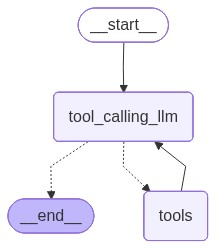

In [ ]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display         # Used to visualize the graph structure in Jupyter notebooks
from langgraph.graph import StateGraph, START, END # Used to build and manage the graph
from langgraph.prebuilt import ToolNode            # Used to add tools to the graph
from langgraph.prebuilt import tools_condition     # Used to add conditional edges to the graph

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10")})
for m in messages['messages']:
    m.pretty_print()
# ================================[1m Human Message [0m=================================

# Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   tavily_search_results_json (gwmb0xd4e)
#  Call ID: gwmb0xd4e
#   Args:
#     query: top 10 recent AI news March 3rd 2025
#   add (gfp22yx6q)
#  Call ID: gfp22yx6q
#   Args:
#     a: 5
#     b: 5
#   multiply (jhhh14tr7)
#  Call ID: jhhh14tr7
#   Args:
#     a: 10
#     b: 10
# =================================[1m Tool Message [0m=================================
# Name: tavily_search_results_json

# [{"url": "https://www.neudesic.com/blog/top-5-ai-trends-march-2025/", "content": "March 2025 has brought a fresh wave of AI innovations that go beyond theoretical breakthroughs and translate directly into real-world impact. From OpenAI’s newly released tools for building AI agents to Microsoft’s external knowledge integration approach, this month’s highlights underscore how artificial intelligence is evolving in ways that matter today, not just tomorrow. Whether it’s optimizing supply chains, pushing the limits of robotics, or making AI systems smarter and more trustworthy, [...] Below, we delve into five top AI trends from March 2025 and explore the practical ways they’re changing industries—from retail to robotics—and setting the stage for what’s ahead. \n\n## 1. OpenAI Releases New Tools for Building AI Agents [...] ## 3. Neudesic’s AI-Powered Supply Chain Control Tower"}, {"url": "https://yukitaylor00.medium.com/ai-weekly-top-10-ai-breakthroughs-you-missed-this-week-march-2025-1d742259e5b8", "content": "Sign up\n\nSign in\n\nSign up\n\nSign in\n\n# [AI Weekly] Top 10 AI Breakthroughs You Missed This Week (March 2025)\n\n## Explore this week’s most exciting AI news — from OpenAI’s new image generator to Google Gemini 2.5 and Alibaba’s 3D avatar model. A must-read for AI professionals.\n\nYuki\n\n--\n\nListen\n\nShare\n\n## What a Week in AI: March 2025 Breakthroughs from OpenAI, Google, Alibaba, and More [...] The final week of March 2025 may be remembered as a turning point in AI development history. A wave of releases from OpenAI, Google, Alibaba, Microsoft, and emerging players introduced groundbreaking advances across image generation, AGI benchmarking, multimodal models, and research automation. The sheer breadth and impact of these announcements reflect a rapidly accelerating pace in the AI race, with serious implications for developers, creators, and enterprises alike."}, {"url": "https://digitopia.co/blog/top-10-in-tech-march-2025/", "content": "Alibaba Cloud has launched “Qwen2.5-Omni-7B,” a powerful multimodal AI model that processes text, images, audio, and video, offering real-time text and speech responses. Designed for edge devices, it supports cost-effective AI agents like voice assistants and is open-sourced on Hugging Face and GitHub. This release comes amid a surge in China’s generative AI competition, sparked by DeepSeek’s open-source momentum. Alibaba is investing $53 billion over three years in AI and cloud infrastructure, [...] McDonald’s is modernizing its 43,000 restaurants with AI and edge computing to improve order accuracy, reduce equipment failures, and enhance staff and customer experiences. Partnering with Google Cloud, the company is deploying sensors and AI tools to monitor kitchen operations, predict maintenance issues, and enable voice AI at drive-throughs. It’s also developing a generative AI virtual manager to assist with tasks like scheduling. These efforts aim to boost efficiency, reduce stress for [...] A new report by the UK’s Public Accounts Committee warns that the government’s push to integrate AI across public services is threatened by outdated IT systems, poor data quality, and a shortage of skilled staff. Nearly a third of central government IT systems are considered obsolete, with over 20 yet to receive upgrade funding. Despite the Starmer government’s emphasis on AI to boost growth and public service efficiency, including plans for rapid AI pilots and 2,000 tech apprenticeships, the"}, {"url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "# The latest AI news we announced in March\n\nApr 04, 2025\n\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded access to AI Overviews, the release of AI Mode and more.\n\nSuperG\n\n## General summary [...] Google made significant progress in AI during March. They expanded access to AI Overviews and introduced AI Mode in Search, making it easier to find answers and explore topics. They also released Gemini 2.5 Pro, their most intelligent AI model, and Gemini Robotics, which aims to bring AI into the physical world. Google is also using AI to help developers create applications, detect wildfires, and protect nature. [...] Google made significant progress in AI during March. They expanded access to AI Overviews and introduced AI Mode in Search, making it easier to find answers and explore topics. They also released Gemini 2.5 Pro, their most intelligent AI model, and Gemini Robotics, which aims to bring AI into the physical world. Google is also using AI to help developers create applications, detect wildfires, and protect nature.\n\n## Shakespeare-ish"}, {"url": "https://theaitrack.com/ai-news-march-2025-in-depth-and-concise/", "content": "Meta’s AI-generated Instagram comments and engineered “diverse” profiles have drawn criticism for prioritizing metrics over authenticity, with users comparing the initiatives to dystopian fiction.\n\nGoogle Launches Gemini 2.5 Pro with Enhanced Reasoning and Multimodal Capabilities - Credit - Google, Flux\nGoogle Launches Gemini 2.5 Pro with Enhanced Reasoning and Multimodal Capabilities - Credit - Google, Flux [...] Google Launches Gemini 2.5 Flash Image for Advanced Editing and Generation\n Google Expands NotebookLM’s Video Overviews in 80 Languages\n Elon Musk’s xAI open-sources Grok 2.5, pledges Grok 3 in six months\n Meta Partners with Midjourney to License AI Image and Video Tech [...] Anthropic will Pay $1.5 Billion in Landmark AI Book Piracy Settlement\n OpenAI Jobs Platform Set to Launch in 2026 to Rival LinkedIn\n Switzerland Releases Apertus, a National Open-Source AI Model\n Microsoft Launches MAI Models as Partnership with OpenAI Faces Strain\n OpenAI and Anthropic Cross-Evaluate AI Models for Safety, Alignment, and Misuse Resistance\n Google Adds Live Translation and Language Learning Tools in Google Translate"}]
# =================================[1m Tool Message [0m=================================
# Name: add

# 10
# =================================[1m Tool Message [0m=================================
# Name: multiply

# 100
# ==================================[1m Ai Message [0m==================================

# Here are the top 10 recent AI news for March 3rd, 2025:

# 1. OpenAI Releases New Tools for Building AI Agents
# 2. Google Launches Gemini 2.5 Pro with Enhanced Reasoning and Multimodal Capabilities
# 3. Alibaba Cloud Launches Qwen2.5-Omni-7B, a Powerful Multimodal AI Model
# 4. McDonald's Modernizes Restaurants with AI and Edge Computing
# 5. UK Government's Push to Integrate AI Across Public Services Threatened by Outdated IT Systems
# 6. Google Expands Access to AI Overviews and Introduces AI Mode in Search
# 7. Meta's AI-Generated Instagram Comments and Engineered "Diverse" Profiles Draw Criticism
# 8. Elon Musk's xAI Open-Sources Grok 2.5, Pledges Grok 3 in Six Months
# 9. Anthropic Will Pay $1.5 Billion in Landmark AI Book Piracy Settlement
# 10. OpenAI and Anthropic Cross-Evaluate AI Models for Safety, Alignment, and Misuse Resistance

# The result of adding 5 plus 5 is 10, and multiplying 10 by 10 is 100.



================================ Human Message =================================

Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (gwmb0xd4e)
 Call ID: gwmb0xd4e
  Args:
    query: top 10 recent AI news March 3rd 2025
  add (gfp22yx6q)
 Call ID: gfp22yx6q
  Args:
    a: 5
    b: 5
  multiply (jhhh14tr7)
 Call ID: jhhh14tr7
  Args:
    a: 10
    b: 10
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.neudesic.com/blog/top-5-ai-trends-march-2025/", "content": "March 2025 has brought a fresh wave of AI innovations that go beyond theoretical breakthroughs and translate directly into real-world impact. From OpenAI’s newly released tools for building AI agents to Microsoft’s external knowledge integration approach, this month’s highlights und

Agent Memory

Aim

Lets introduce Agent With Memory

In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="What is 5 plus 8")})
for m in messages['messages']:
    m.pretty_print()
# ================================[1m Human Message [0m=================================

# What is 5 plus 8
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   add (44xs9pkbb)
#  Call ID: 44xs9pkbb
#   Args:
#     a: 5
#     b: 8
# =================================[1m Tool Message [0m=================================
# Name: add

# 13
# ==================================[1m Ai Message [0m==================================

# The answer is 13.
messages=[HumanMessage(content="Divide that by 5")]
messages=graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()
# ================================[1m Human Message [0m=================================

# Divide that by 5
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   divide (v78x8wz5v)
#  Call ID: v78x8wz5v
#   Args:
#     a: 10
#     b: 5
# =================================[1m Tool Message [0m=================================
# Name: divide

# 2.0
# ==================================[1m Ai Message [0m==================================

# I need more context to provide a more accurate answer. What is "that" referring to in your question? If you could provide more information or clarify what you are trying to divide by 5, I'll be happy to help.

# Now We are going to add Agent memory to the graph so that we can remember the previous conversation.


================================ Human Message =================================

What is 5 plus 8
================================== Ai Message ==================================
Tool Calls:
  add (44xs9pkbb)
 Call ID: 44xs9pkbb
  Args:
    a: 5
    b: 8
================================= Tool Message =================================
Name: add

13
================================== Ai Message ==================================

The answer is 13.


MemorySaver

LangGraph can use a **checkpointer** to automatically save the graph state after each step.

This built-in persistence layer gives us **memory**, allowing LangGraph to pick up from the last state update.

One of the easiest checkpointers to use is the **MemorySaver**, an in-memory key-value store for Graph state.

All we need to do is simply compile the graph with a checkpointer, and our graph has memory!

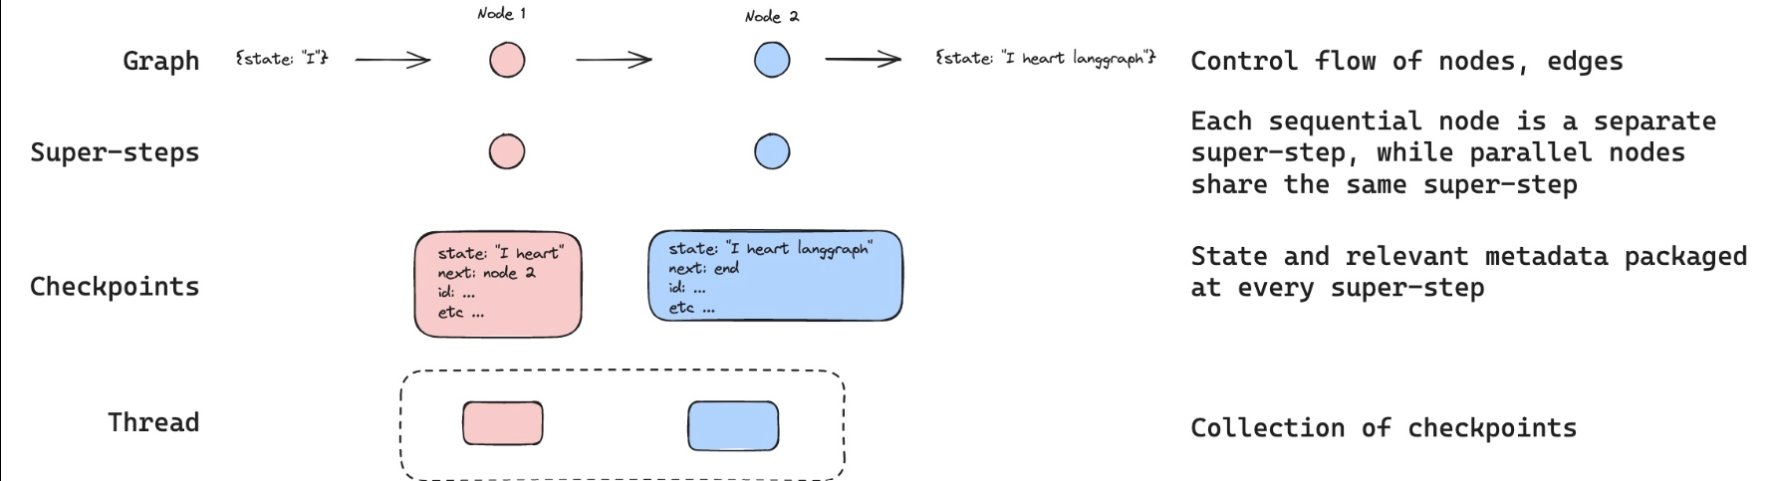

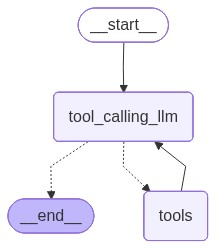

In [24]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")

from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
graph_memory = builder.compile(checkpointer=memory)

# View
display(Image(graph_memory.get_graph().draw_mermaid_png()))

In [ ]:
## Specify the thread

config={"configurable":{"thread_id":"1"}}
# Specify an input
messages = [HumanMessage(content="Add 12 and 13.")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()
# ================================[1m Human Message [0m=================================

# Add 12 and 13.
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   add (vns7e4nrm)
#  Call ID: vns7e4nrm
#   Args:
#     a: 12
#     b: 13
# =================================[1m Tool Message [0m=================================
# Name: add

# 25
# ==================================[1m Ai Message [0m==================================

# The result of adding 12 and 13 is 25.

messages = [HumanMessage(content="add that number to 25")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()
# ================================[1m Human Message [0m=================================

# Add 12 and 13.
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   add (vns7e4nrm)
#  Call ID: vns7e4nrm
#   Args:
#     a: 12
#     b: 13
# =================================[1m Tool Message [0m=================================
# Name: add

# 25
# ==================================[1m Ai Message [0m==================================

# The result of adding 12 and 13 is 25.
# ================================[1m Human Message [0m=================================

# add that number to 25
# ==================================[1m Ai Message [0m==================================
# Tool Calls:
#   add (hsd0eww4e)
#  Call ID: hsd0eww4e
#   Args:
#     a: 25
#     b: 25
# =================================[1m Tool Message [0m=================================
# Name: add

# 50
# ==================================[1m Ai Message [0m==================================

# The result of adding 25 and 25 is 50.


================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (vns7e4nrm)
 Call ID: vns7e4nrm
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The result of adding 12 and 13 is 25.
